好坏质检分类实战task：
1、基于data_class_raw.csv数据，根据高斯分布概率密度函数，寻找异常点并剔除
2、基于data_class_processed.csv数据，进行PCA处理，确定重要数据维度及成分
3、完成数据分离，数据分离参数：random_state=4,test_size=0.4
4、建立KNN模型完成分类，n_neighbors取10，计算分类准确率，可视化分类边界
5、计算测试数据集对应的混淆矩阵，计算准确率、召回率、特异度、精确率、F1分数
6、尝试不同的n_neighbors（1-20）,计算其在训练数据集、测试数据集上的准确率并作图
————————————————

                            版权声明：本文为博主原创文章，遵循 CC 4.0 BY-SA 版权协议，转载请附上原文出处链接和本声明。
                        
原文链接：https://blog.csdn.net/weixin_46344368/article/details/107214449

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data=pd.read_csv('data_class_raw.csv')
X = data.drop('y', axis=1)
y = data.loc[:,'y']


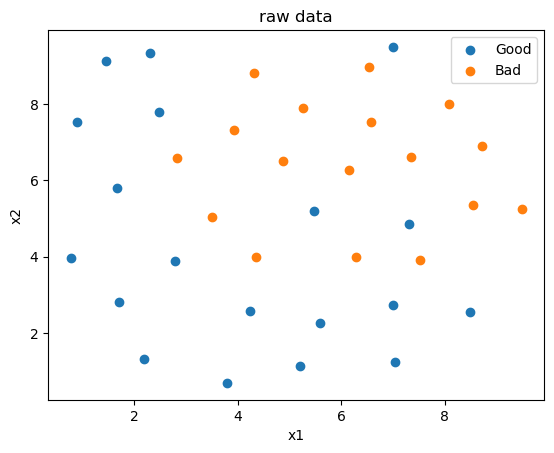

In [18]:
fig = plt.figure()
plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0])
plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('raw data')
plt.legend(['Good','Bad'])
plt.show()

In [19]:
# anomay detection using isolation forest algorithm
from sklearn.covariance import EllipticEnvelope
ad_model = EllipticEnvelope(contamination=0.02)
ad_model.fit(X[y==0])
y_pred_bad = ad_model.predict(X[y==0])
print(y_pred_bad)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1]


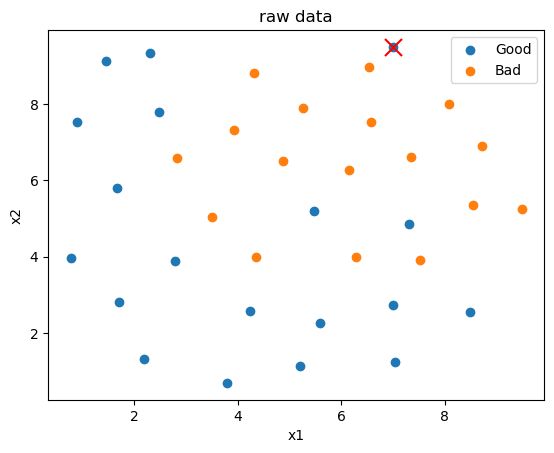

In [21]:
fig2 = plt.figure()
plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0])
plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1])
plt.scatter(X.loc[:,'x1'][y==0][y_pred_bad==-1],X.loc[:,'x2'][y==0][y_pred_bad==-1],color='red',marker='x',s=150)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('raw data')
plt.legend(['Good','Bad'])
plt.show()

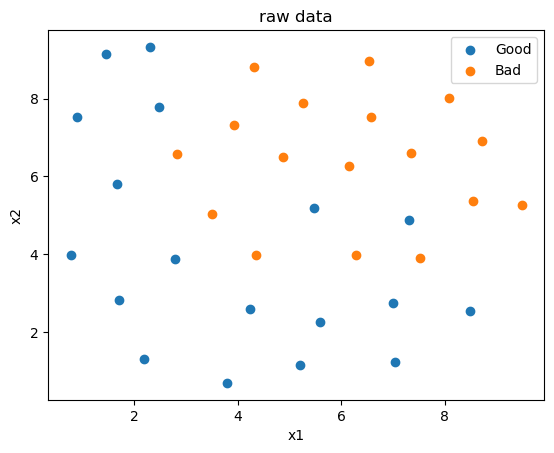

In [22]:
## 2、基于data_class_processed.csv数据，进行PCA处理，确定重要数据维度及成分
data=pd.read_csv('data_class_processed.csv')
X = data.drop('y', axis=1)
y = data.loc[:,'y']
fig = plt.figure()
plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0])
plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('raw data')
plt.legend(['Good','Bad'])
plt.show()

[0.5369408 0.4630592]


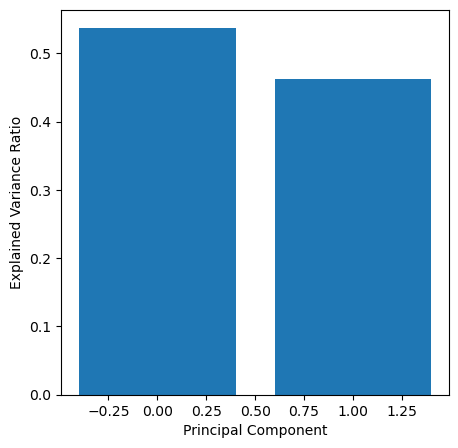

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_norm = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_norm)
var_ratio = pca.explained_variance_ratio_

print(var_ratio)
fig4 = plt.figure(figsize=(5, 5))
plt.bar(range(len(var_ratio)), var_ratio)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.show()

In [26]:
#3、完成数据分离，数据分离参数：random_state=4,test_size=0.4
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=0.4)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (21, 2)
X_test shape: (14, 2)
y_train shape: (21,)
y_test shape: (14,)


In [35]:
#4、建立KNN模型完成分类，n_neighbors取10，计算分类准确率，可视化分类边界
# %matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_train, y_train)
y_train_predict = knn_10.predict(X_train)
y_test_predict = knn_10.predict(X_test)

# 计算分类准确率
from sklearn.metrics import accuracy_score
print("训练集上的准确率：", accuracy_score(y_train, y_train_predict))
print("测试集上的准确率：", accuracy_score(y_test, y_test_predict))

# 可视化分类边界
xx,yy = np.meshgrid(np.arange(0,10,0.05),np.arange(0,10,0.05))
print(xx.shape,yy.shape)

x_range=np.c_[xx.ravel(),yy.ravel()]


训练集上的准确率： 0.9047619047619048
测试集上的准确率： 0.6428571428571429
(200, 200) (200, 200)


d:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


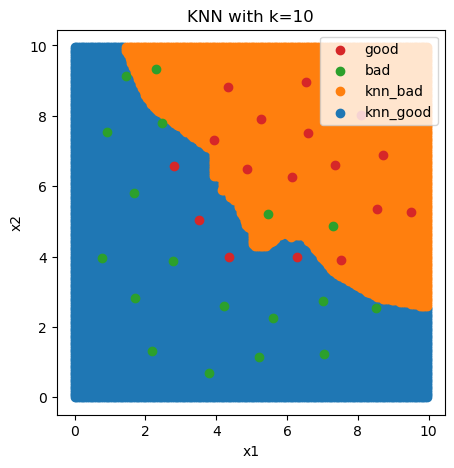

In [40]:
y_range_pred = knn_10.predict(x_range)
fig4 = plt.figure(figsize=(5, 5))
knn_bad =plt.scatter(x_range[:,0][y_range_pred == 0], x_range[:,1][y_range_pred == 0])
knn_good =plt.scatter(x_range[:,0][y_range_pred == 1], x_range[:,1][y_range_pred == 1])

bad = plt.scatter(X.loc[:,'x1'][y==0],X.loc[:,'x2'][y==0])
good = plt.scatter(X.loc[:,'x1'][y==1],X.loc[:,'x2'][y==1])


plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(( good,bad,knn_good,knn_bad), ('good','bad','knn_bad','knn_good'))
plt.title('KNN with k=10')
plt.show()

In [44]:
#5、计算测试数据集对应的混淆矩阵，计算准确率、召回率、特异度、精确率、F1分数
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_predict)
print(cm)
TP=cm[1][1]
TN=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
accuracy=(TP+TN)/(TP+TN+FP+FN)
precision=TP/(TP+FP)
recall=TP/(TP+FN)
specificity=TN/(TN+FP)
precision=TP/(TP+FP)
F1=2*precision*recall/(precision+recall)
print("accuracy:",accuracy)
print("precision:",precision)
print("recall:",recall)
print("specificity:",specificity)
print("F1 score:",F1)

[[4 2]
 [3 5]]
accuracy: 0.6428571428571429
precision: 0.7142857142857143
recall: 0.625
specificity: 0.6666666666666666
F1 score: 0.6666666666666666


训练集准确率： [1.0, 1.0, 1.0, 1.0, 1.0, 0.9523809523809523, 0.9523809523809523, 0.9523809523809523, 0.9047619047619048, 0.9047619047619048, 0.9047619047619048, 0.9523809523809523, 0.9047619047619048, 0.9047619047619048, 0.9523809523809523, 0.9047619047619048, 0.9047619047619048, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714]
测试集准确率： [0.5714285714285714, 0.5, 0.5, 0.5714285714285714, 0.7142857142857143, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.5714285714285714, 0.6428571428571429, 0.6428571428571429, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855]


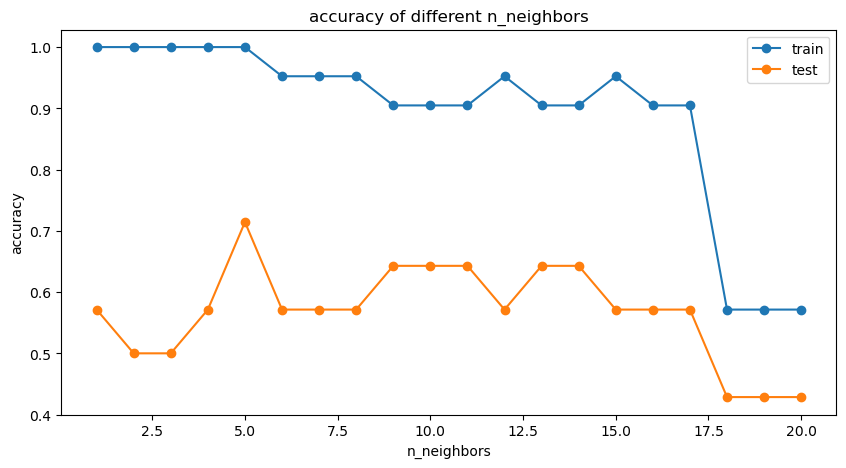

In [55]:
#6、尝试不同的n_neighbors（1-20）,计算其在训练数据集、测试数据集上的准确率并作图
n = [i for i in range(1,21)]
accuracy_train = []
accuracy_test = []
for i in n:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    accuracy_train.append(accuracy_score(y_train, y_pred_train))
    accuracy_test.append(accuracy_score(y_test, y_pred_test))

print('训练集准确率：',accuracy_train)
print('测试集准确率：',accuracy_test)

fig5 = plt.figure(figsize=(10,5))
plt.plot(n, accuracy_train,label='train',marker='o')
plt.plot(n, accuracy_test,label='test',marker='o')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.title('accuracy of different n_neighbors')
plt.legend()
plt.show()

三.总结
好坏质检分类实战summary：
1、通过进行异常检测，帮助找到了潜在的异常数据点；
2、通过PCA分析，发现需要保留2维数据集；
3、实现了训练数据与测试数据的分离，并计算模型对于测试数据的预测准确率
4、计算得到混淆矩阵，实现模型更全面的评估
5、通过新的方法，可视化分类的决策边界
6、通过调整核心参数n_neighbors值，在计算对应的准确率，可以帮助我们更好的确定使用哪个模型
7、核心算法参考链接：https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

data_class_raw.CSV:https://pan.baidu.com/s/1nCsMg-jhpoV06Yj4bYnmSw
提取码：rrk8

data_class_processed.CSV https://pan.baidu.com/s/1V7e6cAma9In7GlXJ-rmotw
提取码：ozhx
————————————————

                            版权声明：本文为博主原创文章，遵循 CC 4.0 BY-SA 版权协议，转载请附上原文出处链接和本声明。
                        
原文链接：https://blog.csdn.net/weixin_46344368/article/details/107214449